In [ ]:

!pip install pandas numpy matplotlib seaborn plotly -q


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [12]:
df = pd.read_csv("walmart.sales.csv")

In [13]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [ ]:
print("Data shape (rows, columns):",df.shape)


Data shape (rows, columns): (6435, 8)


In [ ]:
print("Missing Values in Each Column:")
print(df.isnull().sum())

Missing Values in Each Column:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.drop_duplicates()
df = df.fillna(0)

In [ ]:
total_sales = df['Weekly_Sales'].sum()
avg_sales = df['Weekly_Sales'].mean()
max_sales = df['Weekly_Sales'].max()
min_sales = df['Weekly_Sales'].min()


In [14]:
top_store = df.groupby("Store")['Weekly_Sales'].mean().idxmax()
worst_store = df.groupby("Store")['Weekly_Sales'].mean().idxmin()



# visualization

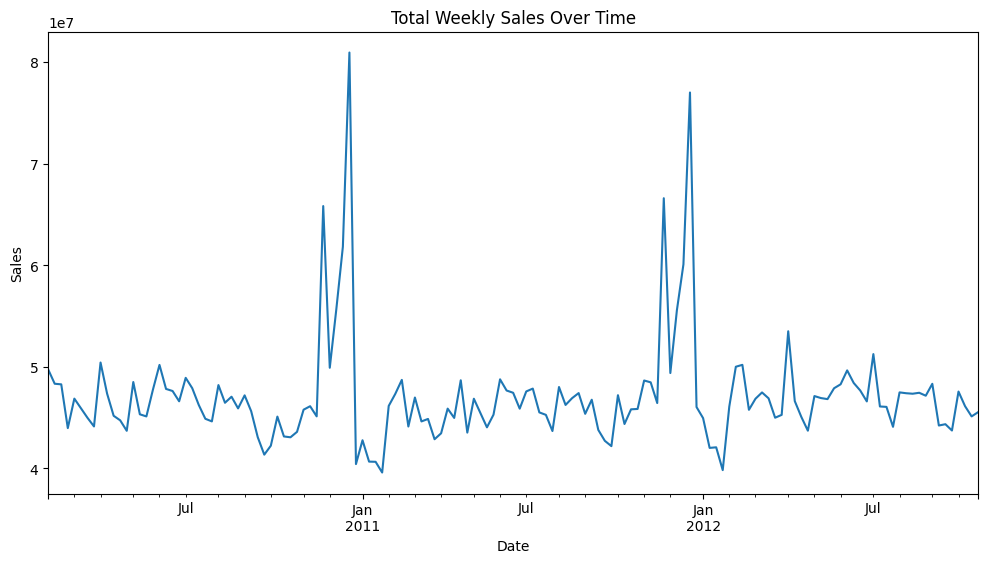

In [ ]:
plt.figure(figsize=(12,6))
df.groupby("Date")["Weekly_Sales"].sum().plot()
plt.title("Total Weekly Sales Over Time")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.show()


In [ ]:
fig1 = px.line(df, x="Date", y="Weekly_Sales", color="Store", title="Weekly Sales Trend by Store")


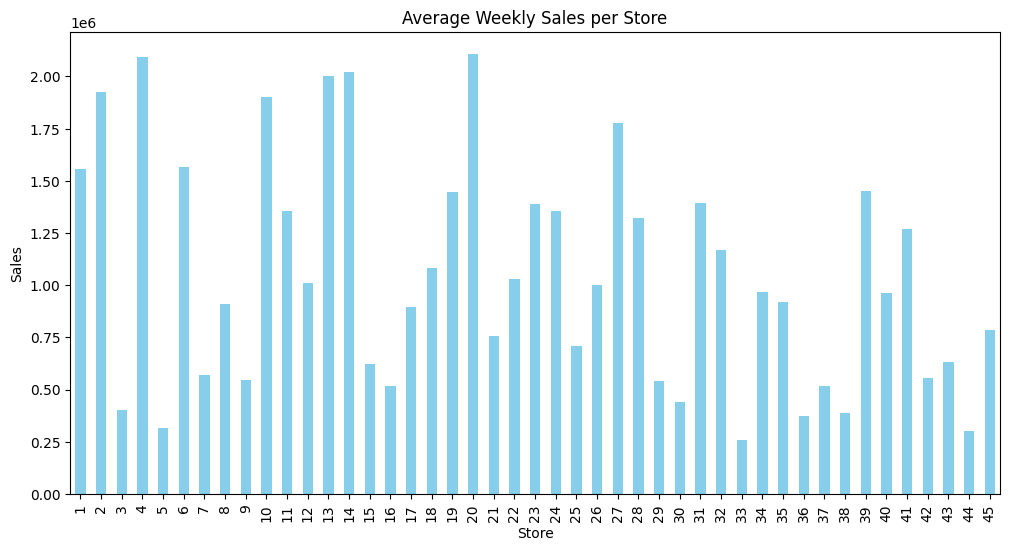

In [ ]:
store_sales = df.groupby("Store")["Weekly_Sales"].mean()
plt.figure(figsize=(12,6))
store_sales.plot(kind="bar", color="skyblue")
plt.title("Average Weekly Sales per Store")
plt.ylabel("Sales")
plt.xlabel("Store")
plt.show()


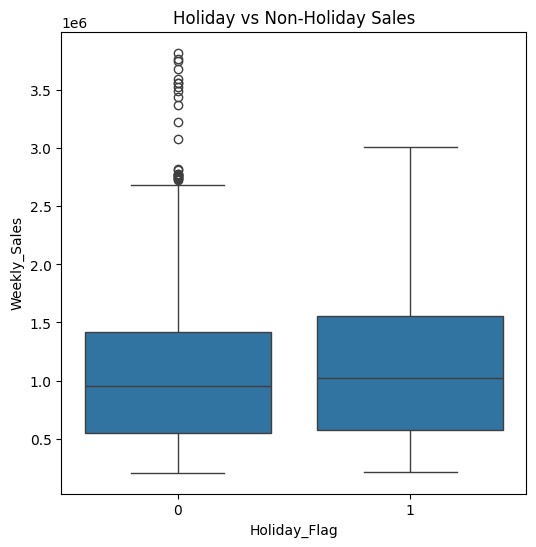

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x="Holiday_Flag", y="Weekly_Sales", data=df)
plt.title("Holiday vs Non-Holiday Sales")
plt.show()


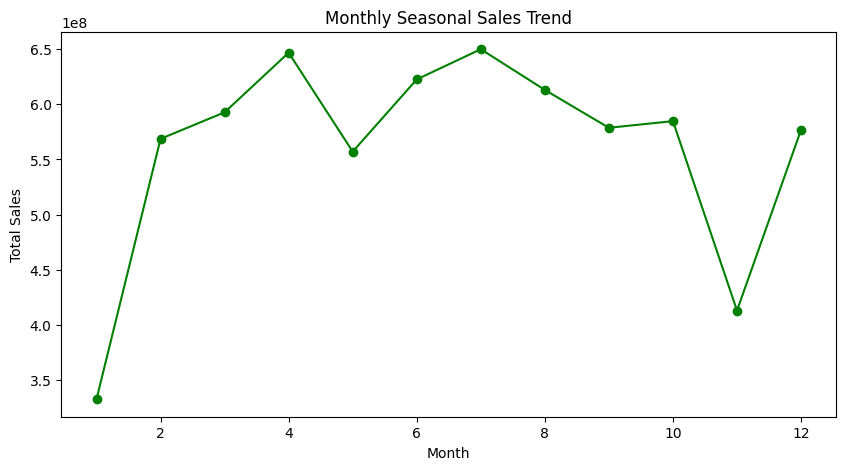

In [ ]:
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby("Month")["Weekly_Sales"].sum()
plt.figure(figsize=(10,5))
monthly_sales.plot(kind="line", marker="o", color="green")
plt.title("Monthly Seasonal Sales Trend")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.show()



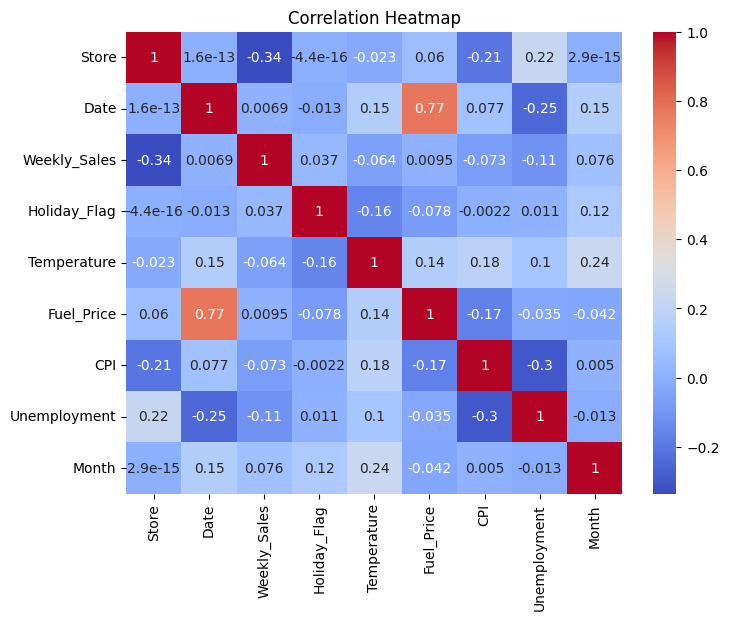

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# conclusion

1. Focus on top-performing stores like Store 20 to replicate successful strategies in weaker locations.
2. Support underperforming stores such as Store 33 with promotions and local strategies.
3. Plan inventory and staffing around holiday seasons to maximize revenue.
4. Monitor external economic factors like fuel prices and unemployment, as they affect sales.

